# Stock Prices Prediction - EDA 

* Let's look at the data, create new features, understand corrlations and visualize data


In [1]:
# Ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import modules
import pandas as pd
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler  
from sklearn.decomposition import PCA 

%matplotlib inline

In [2]:
# Data file paths
path = os.path.join('','data/')

# Stock data files
jpm_stock = path + 'JPM_stock.csv'
jpm_div = path + 'JPM_div.csv'
jpm_split = path + 'JPM_split.csv'
google_stock = path + 'GOOG_stock.csv'
google_div = path + 'GOOG_split.csv'

In [3]:
# Load stock fils
jpm_df = pd.read_csv(jpm_stock, parse_dates=[0])
google_df = pd.read_csv(google_stock, parse_dates=[0])

In [4]:
# Review min, max date and date format for selected stocks
print("JPM stock data date range:",jpm_df.Date.min(),jpm_df.Date.max())
print("GOOGLE stock data date range:",google_df.Date.min(),google_df.Date.max())

JPM stock data date range: 1980-03-17 00:00:00 2020-11-20 00:00:00
GOOGLE stock data date range: 2004-08-19 00:00:00 2020-11-20 00:00:00


In [5]:
# Get start date - max of min date for stock
start_date = np.max([jpm_df.Date.min(),google_df.Date.min()])
start_date

Timestamp('2004-08-19 00:00:00')

In [6]:
# Looking at the Market Index and selected stocks, we will need to select min data as '08/19/2004' 

In [7]:
# Create date filter
jpm_cond = jpm_df['Date'] >= start_date
google_cond = google_df['Date'] >= start_date

In [8]:
# Filter date for all data sets so we have same start date and end date
jpm_df= jpm_df[jpm_cond]
google_df= google_df[google_cond]

In [9]:
# Sample data for JPM
jpm_df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
6166,2004-08-19,38.320000,38.320000,37.849998,38.000000,24.372349,7859600
6167,2004-08-20,37.970001,38.799999,37.919998,38.650002,24.789234,9293600
6168,2004-08-23,38.750000,38.880001,38.470001,38.549999,24.725105,8000900


#### Overiew of the data columns

* There are multiple columns in the dataset – Date, Open, High, Low, close and Volume.

* The Open and Close represents the starting and ending trade price on a particular day.

* High and Low represents the maximum and minimum stock price for the day.

* Volume is the number of stocks bought or sold on a particular day.

In [10]:
jpm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4095 entries, 6166 to 10260
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4095 non-null   datetime64[ns]
 1   Open       4095 non-null   float64       
 2   High       4095 non-null   float64       
 3   Low        4095 non-null   float64       
 4   Close      4095 non-null   float64       
 5   Adj Close  4095 non-null   float64       
 6   Volume     4095 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 255.9 KB


In [11]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4095 entries, 0 to 4094
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4095 non-null   datetime64[ns]
 1   Open       4095 non-null   float64       
 2   High       4095 non-null   float64       
 3   Low        4095 non-null   float64       
 4   Close      4095 non-null   float64       
 5   Adj Close  4095 non-null   float64       
 6   Volume     4095 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 255.9 KB


All data files have 4095 rows with no null values.

In [12]:
# Now we know all df's have date column and same record count i.e. 2620. Let's change date format for all df's
jpm_df['Date']= pd.to_datetime(jpm_df.Date,format='%Y-%m-%d')
google_df['Date']= pd.to_datetime(google_df.Date,format='%Y-%m-%d')

In [13]:
# Verify Sample result - as all df's have same columns, we dont need to check all df's
jpm_df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
6166,2004-08-19,38.320000,38.320000,37.849998,38.000000,24.372349,7859600
6167,2004-08-20,37.970001,38.799999,37.919998,38.650002,24.789234,9293600
6168,2004-08-23,38.750000,38.880001,38.470001,38.549999,24.725105,8000900


[]

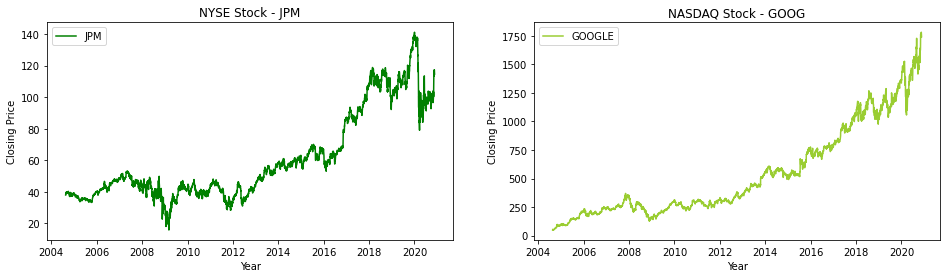

In [14]:
# Plot closing price to visualize the trend 
fig = plt.figure(figsize=(16,4))

plt.subplot(1, 2, 1)
plt.plot(jpm_df['Date'], jpm_df['Close'], c='green')

# Define legend and axis labels    
plt.legend(['JPM'])
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('NYSE Stock - JPM')

plt.subplot(1, 2, 2)
plt.plot(google_df['Date'], google_df['Close'], c='yellowgreen')

# Define legend and axis labels    
plt.legend(['GOOGLE'])
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('NASDAQ Stock - GOOG')

# Show chart
plt.plot()

* The closing price of a stock is only its cash value at day's end, whereas the adjusted closing price factors in things like dividends, stock splits and new stock offerings. However we will use stock lcosing price to caluclate features as that is the price the stock open's with in next day traing session.

* The 50-day moving average is a popular technical indicator which investors use to analyze price trends. It is simply a security's average closing price over the last 50 days. Now, let’s calculate 50 day moving average as a new feature that will help us to predict our target stock value.

In [15]:
# Let's calculate moving average
jpm_df['moving_avg']= jpm_df['Close'].rolling(window=50,min_periods=0).mean()
google_df['moving_avg']= google_df['Close'].rolling(window=50,min_periods=0).mean()

* Note: The 50-day moving average is perceived to be the dividing line between a stock that is technically healthy and one that is not. Furthermore, the percentage of stocks above their 50-day moving average helps determine the overall health of the market.

[]

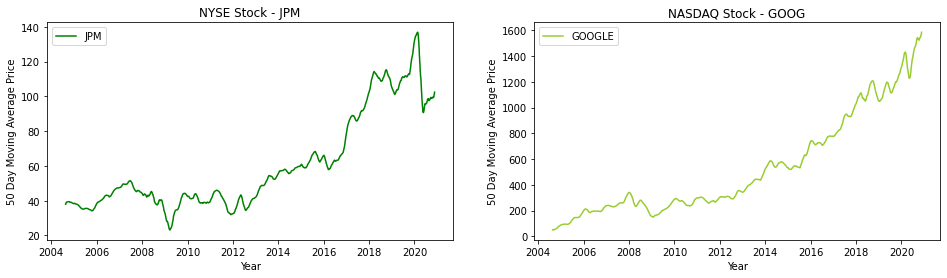

In [16]:
# Plot 50 day moving average price to visualize the trend 
fig = plt.figure(figsize=(16,4))

plt.subplot(1, 2, 1)
plt.plot(jpm_df['Date'], jpm_df['moving_avg'], c='green')

# Define legend and axis labels    
plt.legend(['JPM'])
plt.xlabel('Year')
plt.ylabel('50 Day Moving Average Price')
plt.title('NYSE Stock - JPM')

plt.subplot(1, 2, 2)
plt.plot(google_df['Date'], google_df['moving_avg'], c='yellowgreen')

# Define legend and axis labels    
plt.legend(['GOOGLE'])
plt.xlabel('Year')
plt.ylabel('50 Day Moving Average Price')
plt.title('NASDAQ Stock - GOOG')

# Show chart
plt.plot()

Now, we will try to obtain two more features: Volume daily rate of change (increase/decrease) and Closing price daily rate of change (increase/decrease)

In [17]:
# Variable intialization
i=1
jpm_volume_rate_change = [0]
jpm_close_rate_change = [0]
google_volume_rate_change = [0]
google_close_rate_change = [0]

# Loop through df length
while i<len(jpm_df):
    
    jpm_volume_rate_change.append(jpm_df.iloc[i]['Volume'] - jpm_df.iloc[i-1]['Volume'])
    jpm_close_rate_change.append(jpm_df.iloc[i]['Close'] - jpm_df.iloc[i-1]['Close'])

    google_volume_rate_change.append(google_df.iloc[i]['Volume'] - google_df.iloc[i-1]['Volume'])
    google_close_rate_change.append(google_df.iloc[i]['Close'] - google_df.iloc[i-1]['Close'])

    i+=1

# Append values to df    
jpm_df['volume_rate'] = jpm_volume_rate_change
jpm_df['closing_rate'] = jpm_close_rate_change
google_df['volume_rate'] = google_volume_rate_change
google_df['closing_rate'] = google_close_rate_change

In [18]:
# View sample data 
google_df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,moving_avg,volume_rate,closing_rate
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300,49.982655,0,0.000000
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800,51.967712,-21928500,3.970115
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800,52.810387,-4600000,0.542965


In [19]:
# View sample data 
jpm_df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,moving_avg,volume_rate,closing_rate
6166,2004-08-19,38.320000,38.320000,37.849998,38.000000,24.372349,7859600,38.000000,0,0.000000
6167,2004-08-20,37.970001,38.799999,37.919998,38.650002,24.789234,9293600,38.325001,1434000,0.650002
6168,2004-08-23,38.750000,38.880001,38.470001,38.549999,24.725105,8000900,38.400000,-1292700,-0.100003


#### Correlation

* Correlation is a measure of relation or dependency between feature. We will use Pearson Correlation. This will help is to understand mathematically if two features share positive, negative or no correlation between the features and dependent variable. 

In [20]:
# Lets check co-relation for JPM stock
jpm_corr = jpm_df.corr(method='pearson')
jpm_corr

,Open,High,Low,Close,Adj Close,Volume,moving_avg,volume_rate,closing_rate
Open,1.000000,0.999662,0.999640,0.999388,0.996073,-0.390208,0.987430,-0.001038,0.004826
High,0.999662,1.000000,0.999366,0.999665,0.996780,-0.380951,0.988561,0.001890,0.016665
Low,0.999640,0.999366,1.000000,0.999631,0.995763,-0.400223,0.986094,-0.004566,0.017179
Close,0.999388,0.999665,0.999631,1.000000,0.996541,-0.390430,0.987185,-0.001514,0.031581
Adj Close,0.996073,0.996780,0.995763,0.996541,1.000000,-0.353539,0.987122,-0.001179,0.027615
Volume,-0.390208,-0.380951,-0.400223,-0.390430,-0.353539,1.000000,-0.367068,0.265051,-0.002945
moving_avg,0.987430,0.988561,0.986094,0.987185,0.987122,-0.367068,1.000000,0.001248,-0.008199
volume_rate,-0.001038,0.001890,-0.004566,-0.001514,-0.001179,0.265051,0.001248,1.000000,-0.020771
closing_rate,0.004826,0.016665,0.017179,0.031581,0.027615,-0.002945,-0.008199,-0.020771,1.000000


In [21]:
# Lets check co-relation for JPM stock
google_corr = google_df.corr(method='pearson')
google_corr

,Open,High,Low,Close,Adj Close,Volume,moving_avg,volume_rate,closing_rate
Open,1.000000,0.999888,0.999852,0.999744,0.999744,-0.535325,0.994888,0.002907,0.028971
High,0.999888,1.000000,0.999811,0.999863,0.999863,-0.533481,0.995179,0.003442,0.035717
Low,0.999852,0.999811,1.000000,0.999885,0.999885,-0.537453,0.994415,0.001579,0.038202
Close,0.999744,0.999863,0.999885,1.000000,1.000000,-0.535566,0.994762,0.002426,0.046034
Adj Close,0.999744,0.999863,0.999885,1.000000,1.000000,-0.535566,0.994762,0.002426,0.046034
Volume,-0.535325,-0.533481,-0.537453,-0.535566,-0.535566,1.000000,-0.537634,0.284550,-0.018134
moving_avg,0.994888,0.995179,0.994415,0.994762,0.994762,-0.537634,1.000000,0.002491,0.021475
volume_rate,0.002907,0.003442,0.001579,0.002426,0.002426,0.284550,0.002491,1.000000,-0.009919
closing_rate,0.028971,0.035717,0.038202,0.046034,0.046034,-0.018134,0.021475,-0.009919,1.000000


<AxesSubplot:>

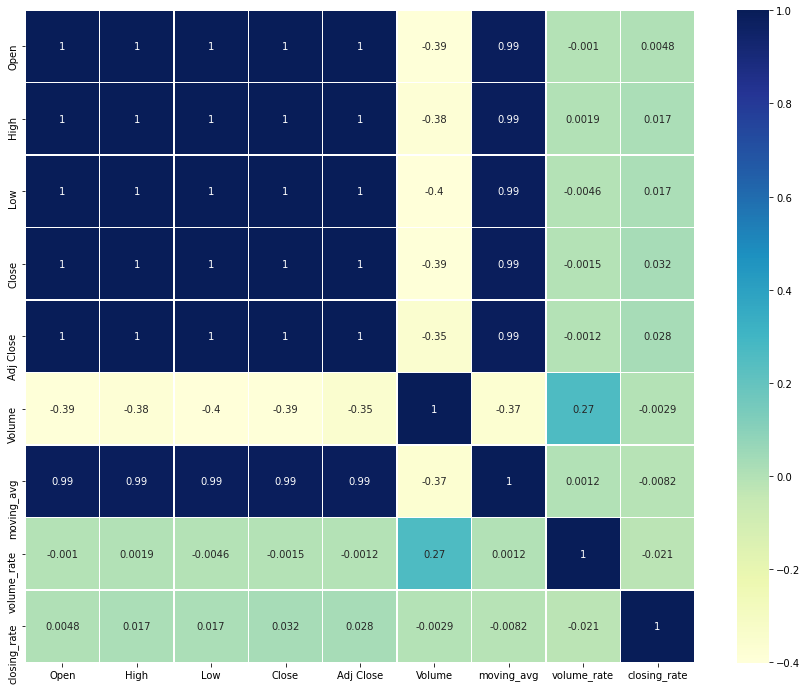

In [22]:
# Lets visualize the correlation coefficient for JPM.
plt.figure(figsize=(15,12))
sns.heatmap(jpm_corr,cmap='YlGnBu', annot=True, linewidth=0.5)

<AxesSubplot:>

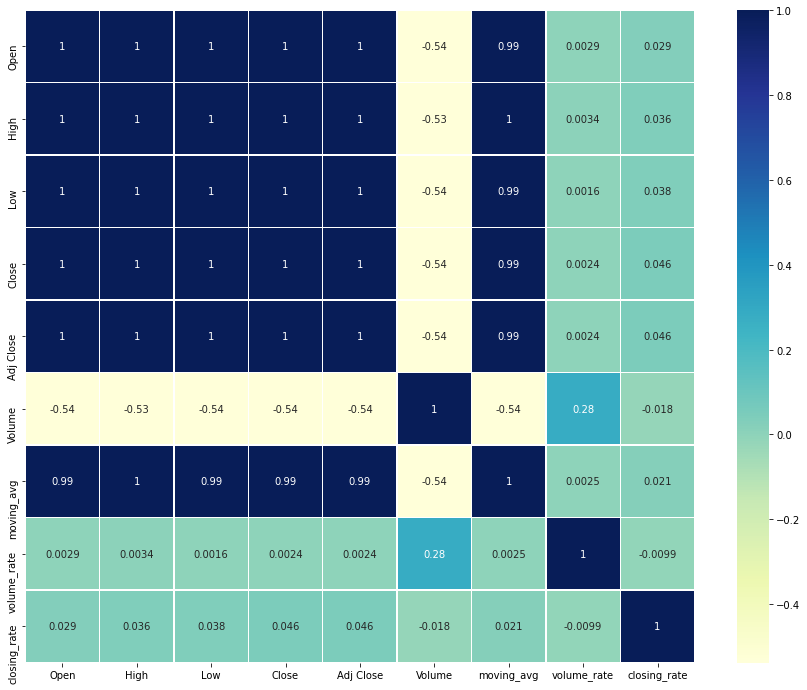

In [23]:
# Lets visualize the correlation coefficient for Google.
plt.figure(figsize=(15,12))
sns.heatmap(google_corr,cmap='YlGnBu', annot=True, linewidth=0.5)

* Heatmap shows, many features have high coorelation. Its is not a good idea to remove all correlated variables. It is only when the correlation is so strong that they do not convey extra information. This is both a function of the strength of correlation, how much data you have and whether any small difference between correlated variables tell you something about the outcome, after all.

* Visualize the moving average and closing price

[]

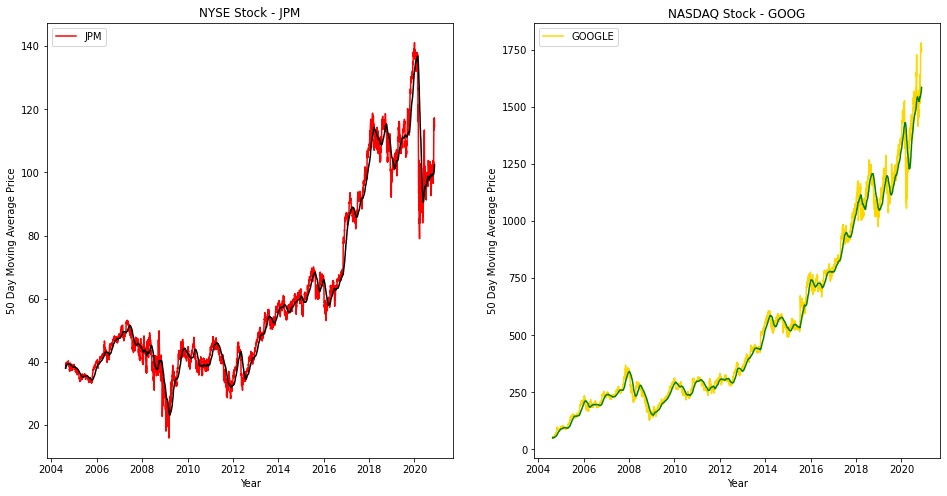

In [24]:
# Plot 50 day moving average price to visualize the trend 
fig = plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)
plt.plot(jpm_df['Date'], jpm_df['Close'], c='red')
plt.plot(jpm_df['Date'], jpm_df['moving_avg'], c='black')

# Define legend and axis labels    
plt.legend(['JPM'])
plt.xlabel('Year')
plt.ylabel('50 Day Moving Average Price')
plt.title('NYSE Stock - JPM')

plt.subplot(1, 2, 2)
plt.plot(google_df['Date'], google_df['Close'], c='gold')
plt.plot(google_df['Date'], google_df['moving_avg'], c='green')

# Define legend and axis labels    
plt.legend(['GOOGLE'])
plt.xlabel('Year')
plt.ylabel('50 Day Moving Average Price')
plt.title('NASDAQ Stock - GOOG')

# Show chart
plt.plot()